# Self-Driving Car Engineer Nanodegree

## Deep Learning



---
## Step 0: Load The Data

In [3]:
import random
import matplotlib.pyplot as plt
from  matplotlib import gridspec
import cv2
import time
import pandas as pd
import pickle
import os
import math
from collections import deque
import numpy as np
from IPython import display
from sklearn.utils import shuffle
from sklearn import model_selection
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.contrib.layers import flatten
import tensorflow as tf


%matplotlib inline


In [4]:
# Load pickled data


root_dir =  os.path.dirname(os.path.realpath("__file__"))
print(root_dir)
# TODO: Fill this in based on where you saved the training and testing data

training_file = os.path.join(root_dir,'traffic-signs-data/train.p')
# validation_file= 
testing_file = 'traffic-signs-data/test.p'

sign_names_file = os.path.join("signnames.csv")


with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    

/home/mandar/projects/mandarup/dl-courses/udacity-CarND/CarND-Traffic-Sign-Classifier-Project


In [5]:

# load data
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**



### Basic Summary of the Data Set 

In [6]:

# Number of training examples
n_train = X_train.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [7]:

# split training data into training, validation and development (additional held out data)
X_train, X_validation, y_train, y_validation = model_selection.train_test_split(
    X_train, y_train, test_size=.4, random_state=0, stratify=y_train)

X_validation, X_dev, y_validation, y_dev = model_selection.train_test_split(
    X_validation, y_validation, test_size=.5, random_state=0, stratify=y_validation)
print("train shape {}".format(X_train.shape))
print("dev shape {}".format(X_dev.shape))
print("valid shape {}".format(X_validation.shape))



train shape (23525, 32, 32, 3)
dev shape (7842, 32, 32, 3)
valid shape (7842, 32, 32, 3)


In [8]:
# get stats of each data set
unique_train_all, counts_train_all = np.unique(train['labels'], return_counts=True)
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_validation, counts_validation = np.unique(y_validation, return_counts=True)
unique_dev, counts_dev = np.unique(y_dev, return_counts=True)
unique_test, counts_test = np.unique(y_dev, return_counts=True)


# print("label distribution: \n\t{}".format([(i[0],round(i[1],1)) for i in zip(unique_train, counts_train/counts_train_all)]))
# print("label distribution: \n\t{}".format(np.bincount(y_validation)/np.bincount( train['labels'])))
# print("label distribution: \n\t{}".format(np.bincount(y_dev)/np.bincount( train['labels'])))
# print("label distribution: \n\t{}".format(np.bincount(y_test)/np.bincount( train['labels'])))



<Container object of 43 artists>

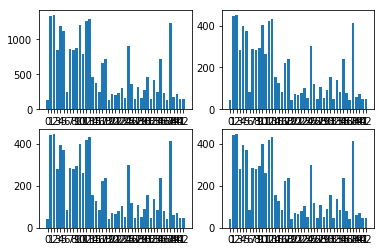

In [9]:
#Distribution of labels in each dataset


plt.figure(1)
plt.subplot(221)
plt.bar(unique_train, counts_train, tick_label=unique_train )
plt.subplot(222)
plt.bar(unique_validation, counts_validation, tick_label=unique_validation )
plt.subplot(223)
plt.bar(unique_dev, counts_dev, tick_label=unique_dev )
plt.subplot(224)
plt.bar(unique_test, counts_test, tick_label=unique_test )
# left, height, width=0.8, bottom=None, hold=None, data=None, **kwargs

In [10]:
#helper functions
def plot_random_image(image_data):
    """Plots random image.
    
    Args:
        image_data (numpy.array) : 3d matrix of color images
    """
    index = random.randint(0, len(image_data))
    image = X_train[index].squeeze()

    plt.figure(figsize=(1,1))
    plt.imshow(image)
    print(y_train[index])
    
    
def plot_random_image_matrix(n_row,n_col,X,y):

    plt.figure(figsize = (11,8))
    gs1 = gridspec.GridSpec(n_row,n_row)
    gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes.

    for i in range(n_row*n_col):
        # i = i + 1 # grid spec indexes from 0
        ax1 = plt.subplot(gs1[i])
        plt.axis('on')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        #plt.subplot(4,11,i+1)
        ind_plot = np.random.randint(1,len(y))
        plt.imshow(X[ind_plot])
        plt.text(2,4,str(y[ind_plot]),
             color='k',backgroundcolor='c')
        plt.axis('off')
    plt.show()
    


2


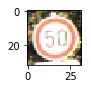

In [11]:
plot_random_image(X_train)

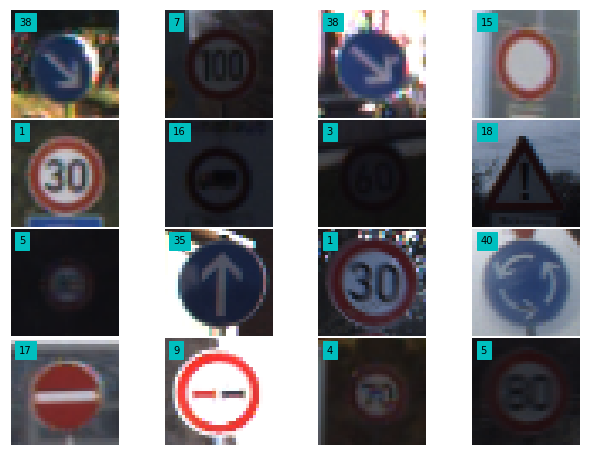

In [12]:
plot_random_image_matrix(4,4,X_train,y_train)

In [13]:
def get_signnames(y):
    """returns label names.
    
    Args:
        y (numpy.array) : an array of labels corresponding to images
    
    """
    # read signnames
    signnames = pd.read_csv(sign_names_file)
    classid = pd.DataFrame(y,columns=["ClassId"])
    labels_df = pd.merge(classid, signnames, how='left')
    print(labels_df.shape, classid.shape)
    #labels_df.SignName
    labels_df['label'] = (labels_df.ClassId.astype(str)
                          + "-"
                          + labels_df.SignName.astype(str))
    return labels_df

(23525, 2) (23525, 1)


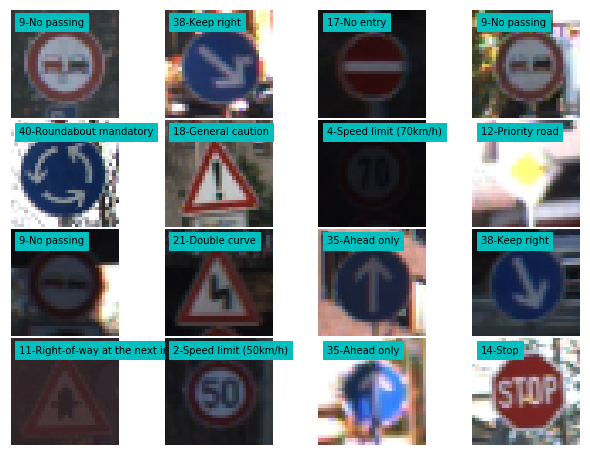

In [14]:
# plot training labels
plot_random_image_matrix(4,4,X_train,get_signnames(y_train).label)

(12630, 2) (12630, 1)


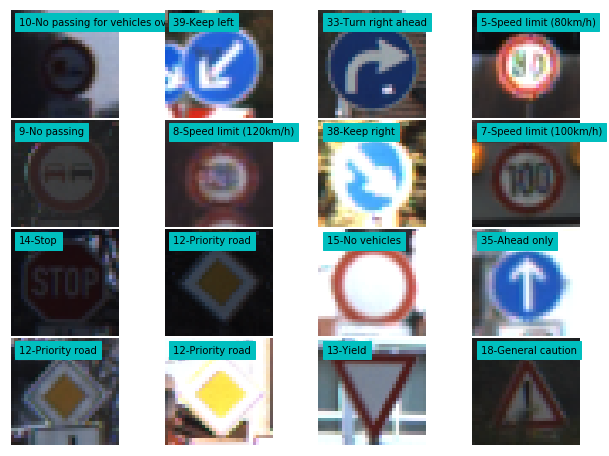

In [15]:
# plot test labels
plot_random_image_matrix(4,4,X_test,get_signnames(y_test).label)

----

## Step 2: Model Architecture



### Pre-process the Data Set (normalization, grayscale, etc.)

In [16]:
def pre_process_image(image):
    """Apply preprocessing.
    
    Apply histogram equalization and scaling.
    
    """
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    #image = image[:,:,0]
    image[:,:,0] = cv2.equalizeHist(image[:,:,0])
    image[:,:,1] = cv2.equalizeHist(image[:,:,1])
    image[:,:,2] = cv2.equalizeHist(image[:,:,2])
    image = image/255.-.5
    #image = cv2.resize(image, (img_resize,img_resize),interpolation = cv2.INTER_CUBIC)

    return image

def apply_image_processing(X):
    return np.array([pre_process_image(X[i]) for i in range(len(X))],
                          dtype = np.float32)


In [17]:
# apply preprocessing
X_train = apply_image_processing(X_train)
X_validation = apply_image_processing(X_validation)
X_dev = apply_image_processing(X_dev)
X_test = apply_image_processing(X_test)

#### Visualize processed data

(23525, 2) (23525, 1)


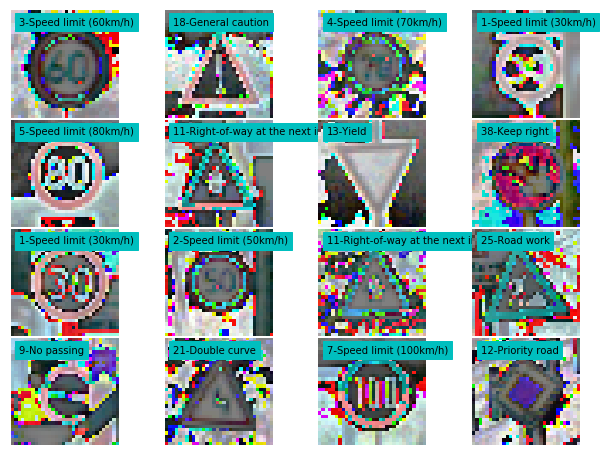

In [18]:
# plot training labels
plot_random_image_matrix(4,4,X_train,get_signnames(y_train).label)

(12630, 2) (12630, 1)


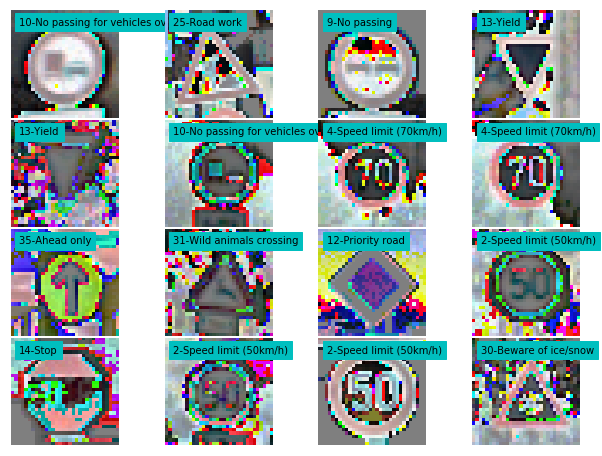

In [19]:
# plot test labels
plot_random_image_matrix(4,4,X_test,get_signnames(y_test).label)

In [20]:
# shuffle training data
X_train, y_train = shuffle(X_train, y_train)

### Model Architecture

In [21]:
EPOCHS = 10000
BATCH_SIZE = 256
N_CLASSES = 43
COLOR_CHANNELS = 3

# helper functions
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, 
                     W, 
                     strides=[1,strides,strides,1],
                     padding='VALID')
    x = tf.nn.bias_add(x, b)
    return x

def maxpool2d(x, k=2):
    return tf.nn.max_pool(
                x,
                ksize=[1,k,k,1],
                strides=[1,k,k,1],
                padding='VALID')


# Placeholders for features, labels etc
x = tf.placeholder(tf.float32, (None, 32, 32, COLOR_CHANNELS))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, N_CLASSES)

keep_prob = tf.placeholder(tf.float32)
learning_rate = tf.placeholder(tf.float32)




In [ ]:
# convnet architecture

# mean and stddev for initializing weights
mu = 0
sigma = 0.1

# keep proba
dropout = 0.5


weights = {'1c': tf.Variable(tf.truncated_normal((5,5,COLOR_CHANNELS,32), mu, sigma)),
           '2c': tf.Variable(tf.truncated_normal((5,5,32,64), mu, sigma)),
           '3d': tf.Variable(tf.truncated_normal(shape=(5*5*64, 512), mean=mu, stddev=sigma)),
           '4d': tf.Variable(tf.truncated_normal((512, 512), mu, sigma)),
           '5out': tf.Variable(tf.truncated_normal((512, N_CLASSES), mu, sigma)),

}

biases  = {'1c': tf.Variable(tf.zeros(32)),
          '2c': tf.Variable(tf.zeros(64)),
           '3d':tf.Variable(tf.zeros(512)),
           '4d':tf.Variable(tf.zeros(512)),
           '5out':tf.Variable(tf.zeros(N_CLASSES)),

       }

# Layer 1: Convolutional.
conv1 = conv2d(x, weights['1c'], biases['1c'], strides=1)
conv1 = tf.nn.relu(conv1)
print('conv1',conv1.get_shape().as_list())
conv1 = maxpool2d(conv1, k=2)
print('conv1-maxpool',conv1.get_shape().as_list())

# Layer 2: Convolutional.
conv2 = conv2d(conv1, weights['2c'], biases['2c'], strides=1)
conv2 = tf.nn.relu(conv2)
print('conv2',conv2.get_shape().as_list())
conv2 = maxpool2d(conv2, k=2)
print('conv2-maxpool',conv2.get_shape().as_list())



#  Layer 3: Fully Connected. 
fc0   = flatten(conv2)
print('input to fully connected layer 3: {}'.format(fc0.get_shape().as_list()))
fc3 = tf.add(tf.matmul(fc0, weights['3d']), biases['3d'])
fc3 = tf.nn.relu(fc3)
fc3 = tf.nn.dropout(fc3, dropout)
print('output of fully connected layer 3: {}'.format(fc3.get_shape().as_list()))

# Layer 4: Fully Connected. 
fc4 = tf.add(tf.matmul(fc3, weights['4d']), biases['4d'])
fc4 = tf.nn.relu(fc4)
fc4 = tf.nn.dropout(fc4, dropout)
print('output of fully connected layer 4: {}'.format(fc4.get_shape().as_list()))


# output layer 5: 
logits = tf.add(tf.matmul(fc4, weights['5out']), biases['5out'])


for k,v in weights.items():
    print(k, v.get_shape().as_list())
    
print('conv1',conv1.get_shape().as_list())
print('conv2', conv2.get_shape().as_list())


conv1 [None, 28, 28, 32]
conv1-maxpool [None, 14, 14, 32]
conv2 [None, 10, 10, 64]
conv2-maxpool [None, 5, 5, 64]
input to fully connected layer 3: [None, 1600]
output of fully connected layer 3: [None, 512]
output of fully connected layer 4: [None, 512]
4d [512, 512]
3d [1600, 512]
5out [512, 43]
2c [5, 5, 32, 64]
1c [5, 5, 3, 32]
conv1 [None, 14, 14, 32]
conv2 [None, 5, 5, 64]


In [23]:
# cost function

regularizers = sum([tf.nn.l2_loss(w) for w in weights.values()])
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy) + 1e-5 * regularizers
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation) 

In [24]:
# Model evalutaion

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

In [40]:

TARGET_ACCURACY = .99
start_time = time.time()
best_valid_accuracy = 0
valid_accuracy_q = deque(maxlen=10)
train_accuracy_q = deque(maxlen=3)
l_rate = .001

best_accuracy = 0
train_accuracy_q.append(0)

continue_training = False

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    if continue_training:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        batch_accuracy = []
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, 
                                                    keep_prob:dropout,
                                                   learning_rate: l_rate})
            
            batch_accuracy.append(evaluate(batch_x, batch_y))
            
        
                                  
        train_accuracy = np.mean(batch_accuracy)                        
        validation_accuracy = evaluate(X_validation, y_validation)
        
        if best_accuracy < train_accuracy:
            best_accuracy = train_accuracy
        
        
        if i > 3  and (np.mean(train_accuracy_q) >= train_accuracy  or best_accuracy - train_accuracy > .001):
            l_rate = l_rate * .9
            print('updating learning rate {}'.format(l_rate))
        
        valid_accuracy_q.append(validation_accuracy)
        train_accuracy_q.append(train_accuracy)
        if validation_accuracy > best_valid_accuracy:
            best_valid_accuracy = validation_accuracy
        print("EPOCH {} Accuracy - Training {:.3f}, Valid {:.3f}, AvgEpochTime {:.2f} s, TotalTime {:.2f} min, l_rate {:.4f}"
              .format(i+1, train_accuracy, validation_accuracy, 
                      (time.time() - start_time)/(i+1), 
                      (time.time() - start_time)/60.,l_rate)
                      )
        if (i % 5 ==0 or i == EPOCHS -1) & i > 0:
            saver.save(sess, './lenet')
            print("Model saved")
        if validation_accuracy >= TARGET_ACCURACY:
            saver.save(sess, './lenet')
            print("Model saved")
            print('Target accuracy reached!')
            break
        if ((len(valid_accuracy_q) == 10 and np.max(list(valid_accuracy_q)[-5:]) < best_valid_accuracy - .01)
            or train_accuracy == 1.):
            saver.save(sess, './lenet')
            print("Model saved")
            print('Overfit!!')
            break
            


Training...

EPOCH 1 Accuracy - Training 0.321, Valid 0.539, AvgEpochTime 19.94 s, TotalTime 0.33 min, l_rate 0.0010
EPOCH 2 Accuracy - Training 0.691, Valid 0.771, AvgEpochTime 20.21 s, TotalTime 0.67 min, l_rate 0.0010
EPOCH 3 Accuracy - Training 0.832, Valid 0.857, AvgEpochTime 20.89 s, TotalTime 1.04 min, l_rate 0.0010
EPOCH 4 Accuracy - Training 0.899, Valid 0.896, AvgEpochTime 21.20 s, TotalTime 1.41 min, l_rate 0.0010
EPOCH 5 Accuracy - Training 0.931, Valid 0.919, AvgEpochTime 21.35 s, TotalTime 1.78 min, l_rate 0.0010
EPOCH 6 Accuracy - Training 0.950, Valid 0.937, AvgEpochTime 21.42 s, TotalTime 2.14 min, l_rate 0.0010
Model saved
EPOCH 7 Accuracy - Training 0.960, Valid 0.941, AvgEpochTime 21.62 s, TotalTime 2.52 min, l_rate 0.0010
EPOCH 8 Accuracy - Training 0.969, Valid 0.953, AvgEpochTime 21.65 s, TotalTime 2.89 min, l_rate 0.0010
EPOCH 9 Accuracy - Training 0.976, Valid 0.958, AvgEpochTime 21.68 s, TotalTime 3.25 min, l_rate 0.0010
EPOCH 10 Accuracy - Training 0.979, Val

In [41]:
# Model evaluation on additional left out data 
# this data can be used multiple times to check model 
# performance on out of sample data
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    dev_accuracy = evaluate(X_dev, y_dev)
    print("Validation Accuracy = {:.3f}".format(dev_accuracy))
    
    



Validation Accuracy = 0.989


In [42]:
# evaluation on test data - only check once after tuning model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.948


In [43]:
# visualizing layers

import math
def get_activations(sess,layer,stimuli):
    units = sess.run(layer,feed_dict={x: stimuli,keep_prob:1.0})
    plot_filter(units)
    
def plot_filter(units):
    filters = units.shape[3]
    plt.figure(1, figsize=(20,20))
    n_columns = 6
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")
        
        

convolution layer 1 visualization from test data


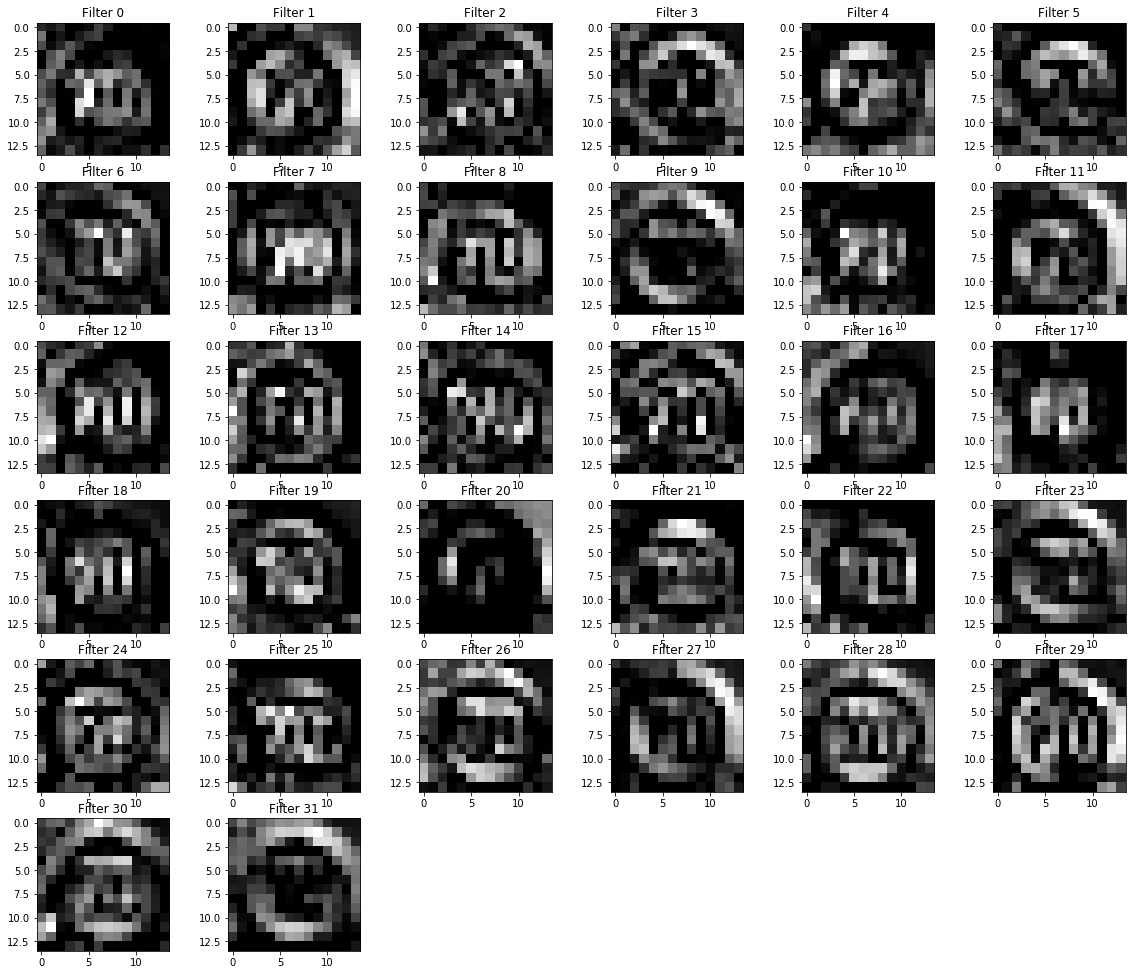

In [44]:
# conv layer 1
print("convolution layer 1 visualization from test data")
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    get_activations(sess,conv1,X_dev[0:1])

convolution layer 2 visualization from test data


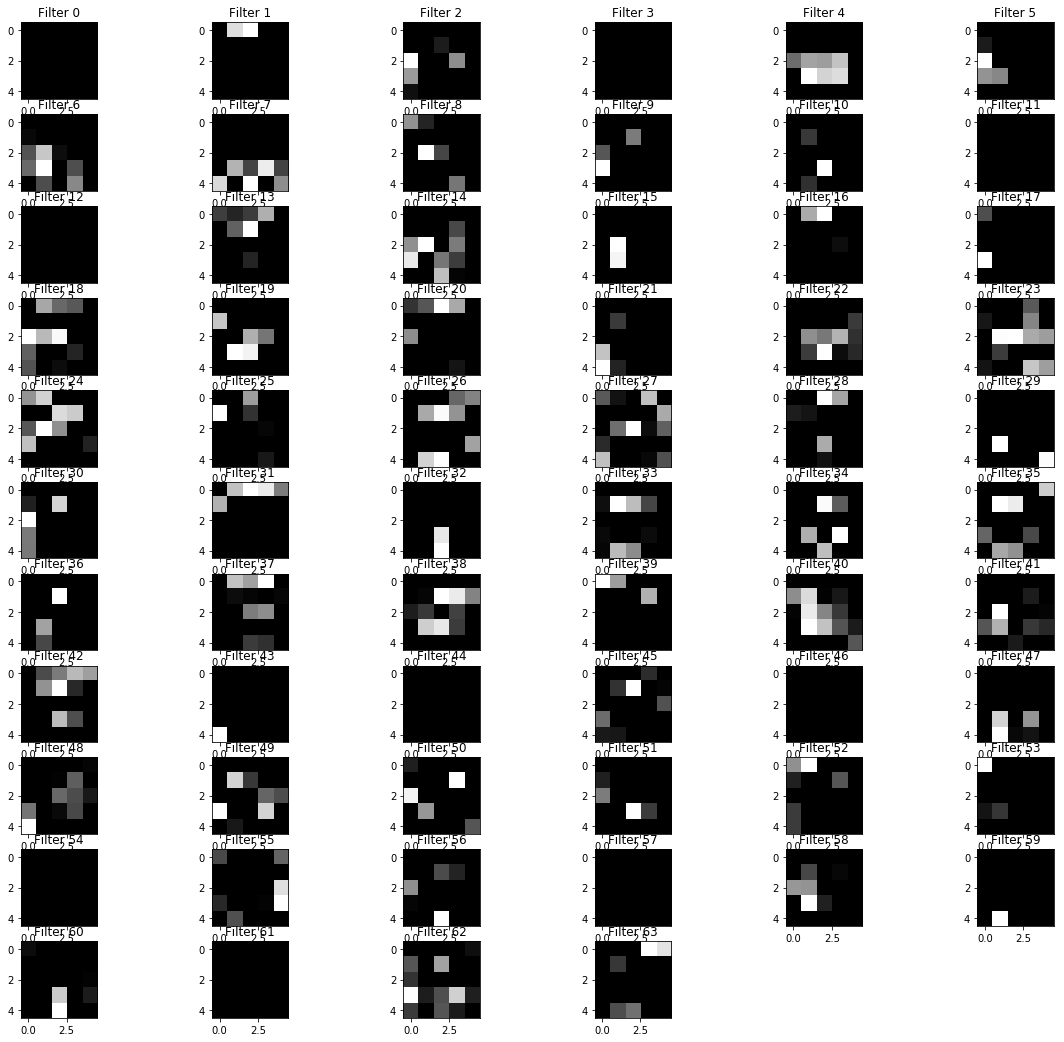

In [45]:

# conv layer 2
print("convolution layer 2 visualization from test data")

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    get_activations(sess,conv2,X_dev[0:1])

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [27]:
def process_new_image(filename):
    image = cv2.imread(filename)
    image = cv2.resize(image,(32,32))
    image = cv2.convertScaleAbs(image)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    #image = image/255.-.5
    return image

In [28]:
extra_images_dir = "./german-traffic-signs-extra"
newdata = [process_new_image(os.path.join(extra_images_dir, name)) for name in os.listdir(extra_images_dir)]
namenewdata = [name for name in os.listdir(extra_images_dir)]
newdata = np.array(newdata, dtype = np.uint8)

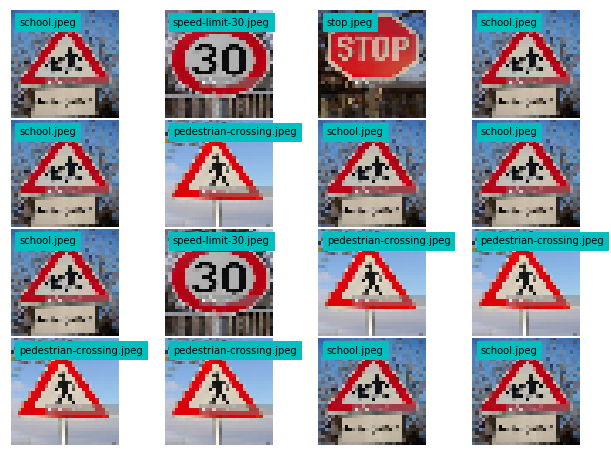

In [30]:
plot_random_image_matrix(4,4,newdata,namenewdata)

### Predict the Sign Type for Each Image

In [31]:
# preprocess

newdata = apply_image_processing(newdata)

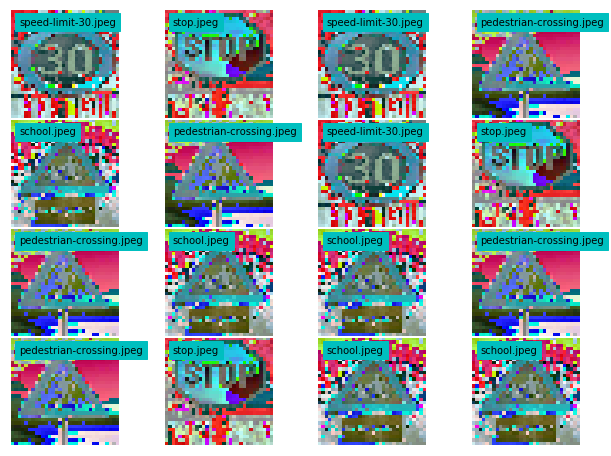

In [32]:
plot_random_image_matrix(4,4,newdata,namenewdata)

In [195]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    labels_pred = tf.nn.softmax(logits)
    feed_dict_new = {x:newdata,keep_prob: 1}
    top5 = tf.nn.top_k(labels_pred, 5)

    predictions = sess.run(labels_pred,feed_dict = feed_dict_new)
    top5_pred = sess.run([labels_pred, top5], feed_dict=feed_dict_new)
    


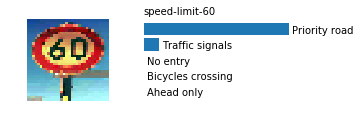

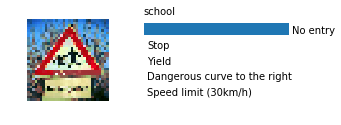

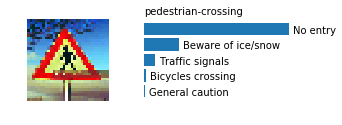

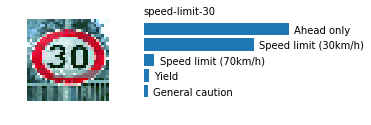

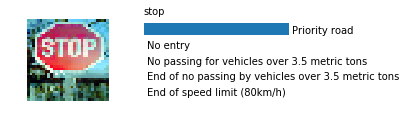

In [196]:
signnames = pd.read_csv(sign_names_file)

for i in range(len(newdata)):
    plt.figure(figsize = (5,1.5))
    gs = gridspec.GridSpec(1, 2,width_ratios=[2,3])
    plt.subplot(gs[0])
    plt.imshow(newdata[i]+.5)
    plt.axis('off')
    plt.subplot(gs[1])
    plt.barh(6-np.arange(5),top5_pred[1][0][i], align='center')
    for i_label in range(5):
        plt.text(top5_pred[1][0][i][i_label]+.02,6-i_label-.25,
            signnames['SignName'][top5_pred[1][1][i][i_label]])
    plt.axis('off');
    plt.text(0,6.95,namenewdata[i].split('.')[0]);
    plt.show();

### Analyze Performance

In [198]:
#0%

---

## Step 4: Visualize the Neural Network's State with Test Images



In [53]:


# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Visualize the activations of convnet layers on new images 

In [49]:
np.random.seed(1)

stop.jpeg


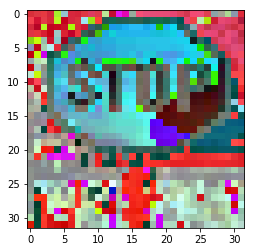

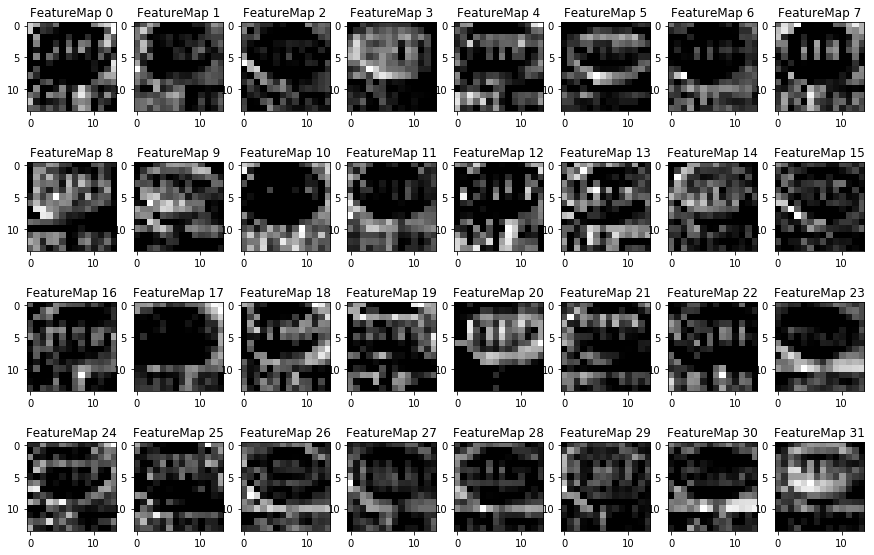

In [51]:
# convolutional layer 1

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    random_image = np.random.choice(range(len(newdata)))
    
    print(namenewdata[random_image])
    plt.imshow(newdata[random_image])
    outputFeatureMap(newdata[random_image].reshape((1,32,32,3)), conv1, activation_min=-1, activation_max=-1 ,plt_num=2)

speed-limit-60.jpeg


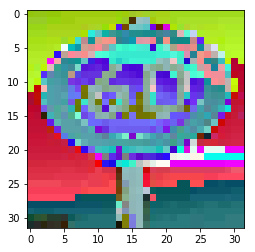

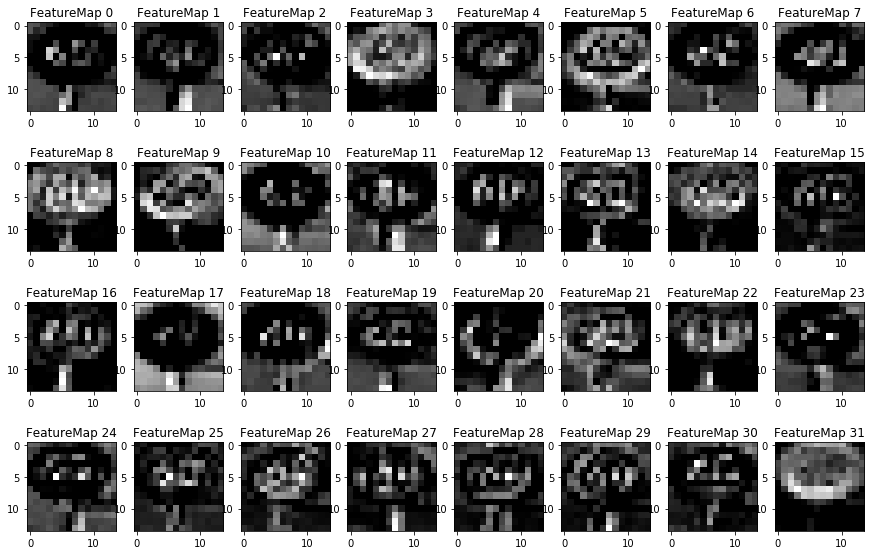

In [52]:
# convolutional layer 1

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    random_image = np.random.choice(range(len(newdata)))
    
    print(namenewdata[random_image])
    plt.imshow(newdata[random_image])
    outputFeatureMap(newdata[random_image].reshape((1,32,32,3)), conv1, activation_min=-1, activation_max=-1 ,plt_num=2)

Above visualizations show that the activations have learnt relevant features from images.
